In [1]:
import importlib
import numpy as np
import sys
import time
sys.path.append('../../')


from astroLuSt.monitoring import timers as almoti



# ExecTimer

## Standard Usage

In [2]:


importlib.reload(almoti)

ET = almoti.ExecTimer(verbose=1)

ET.checkpoint_start('Sup Task', comment='Global Task')

ET.checkpoint_start('Sub Task1')
time.sleep(2)
ET.checkpoint_end('Sub Task1')
ET.checkpoint_start('Sub Task2')
time.sleep(3)
ET.checkpoint_end('Sub Task2', comment='TEST')

ET.checkpoint_end('Sup Task')

ET.estimate_runtime('Sup Task', nrepeats=4, ndone=1)

ET.df_protocoll



######################################################################
INFO: Started Sup Task at 2024-11-05T19:04:23

######################################################################
INFO: Started Sub Task1 at 2024-11-05T19:04:23

INFO: Finished Sub Task1 at 2024-11-05T19:04:25
Required time: 0 days 00:00:02
######################################################################

######################################################################
INFO: Started Sub Task2 at 2024-11-05T19:04:25

INFO: Finished Sub Task2 at 2024-11-05T19:04:28
Required time: 0 days 00:00:03
######################################################################

INFO: Finished Sup Task at 2024-11-05T19:04:28
Required time: 0 days 00:00:05
######################################################################
INFO: Total estimated runtime for 4 repeats: 20000000000 nanoseconds


,Task,Start,End,Duration,Start_Seconds,End_Seconds,Duration_Seconds,Comment_Start,Comment_End
0,Sup Task,2024-11-05 19:04:23,2024-11-05 19:04:28,0 days 00:00:05,1.730833e+09,1.730833e+09,5.078308,Global Task,
1,Sub Task1,2024-11-05 19:04:23,2024-11-05 19:04:25,0 days 00:00:02,1.730833e+09,1.730833e+09,2.003666,,
2,Sub Task2,2024-11-05 19:04:25,2024-11-05 19:04:28,0 days 00:00:03,1.730833e+09,1.730833e+09,3.005017,,TEST


## Usage to have an up-to-date estimate of runtimes

In [3]:

#initialize the timer
ET = almoti.ExecTimer(verbose=0)

repeats = 5 #number of times to repeat the loop


#Execute some loop
ET.checkpoint_start('Global Task')  #to monitor total (actual) duration
for idx in range(repeats):

    #monitor duration of each loop-execution
    ET.checkpoint_start(f'Subtask{idx}')

    #generate random sleeptime (should average out to be 1)
    time.sleep(np.random.normal(1, 0.5, size=1)[0])
    
    ET.checkpoint_end(f'Subtask{idx}')

    #estimate the runtime from the current point of view
    ET.estimate_runtime(r'Subtask', repeats, idx+1)

ET.checkpoint_end('Global Task')

ET.df_protocoll

INFO: Total estimated runtime for 5 repeats: 5000000000 nanoseconds
INFO: Total estimated runtime for 5 repeats: 5000000000 nanoseconds
INFO: Total estimated runtime for 5 repeats: 5000000000 nanoseconds
INFO: Total estimated runtime for 5 repeats: 5000000000 nanoseconds
INFO: Total estimated runtime for 5 repeats: 4000000000 nanoseconds


,Task,Start,End,Duration,Start_Seconds,End_Seconds,Duration_Seconds,Comment_Start,Comment_End
0,Global Task,2024-11-05 19:04:30,2024-11-05 19:04:34,0 days 00:00:04,1.730833e+09,1.730833e+09,4.556543,,
1,Subtask0,2024-11-05 19:04:30,2024-11-05 19:04:31,0 days 00:00:01,1.730833e+09,1.730833e+09,1.906549,,
2,Subtask1,2024-11-05 19:04:31,2024-11-05 19:04:32,0 days 00:00:01,1.730833e+09,1.730833e+09,0.353873,,
3,Subtask2,2024-11-05 19:04:32,2024-11-05 19:04:33,0 days 00:00:01,1.730833e+09,1.730833e+09,1.065029,,
4,Subtask3,2024-11-05 19:04:33,2024-11-05 19:04:34,0 days 00:00:01,1.730833e+09,1.730833e+09,0.957947,,
5,Subtask4,2024-11-05 19:04:34,2024-11-05 19:04:34,0 days 00:00:00,1.730833e+09,1.730833e+09,0.258714,,


## Usage as decorator

### Timing one function

In [4]:
ET.verbose = 1
@ET.time_exec(start_kwargs={'comment':'timed_func'})
def timed_func():
    time.sleep(np.random.rand())
    return 'FINISHED'
tf = timed_func()



######################################################################
INFO: Started Decorator Task at 2024-11-05T19:04:38

INFO: Finished Decorator Task at 2024-11-05T19:04:38
Required time: 0 days 00:00:00
######################################################################


### Getting execution statistics

/home/lukas/github/astroLuSt/demos/monitoring/../../astroLuSt/monitoring/timers.py:444: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


,Task,Start,End,Duration,Start_Seconds,End_Seconds,Duration_Seconds,Comment_Start,Comment_End
7,get_execstats(),2024-11-05 19:06:26,2024-11-05 19:06:27,0 days 00:00:01,1.730834e+09,1.730834e+09,0.521143,__get_execstats()__,__get_execstats()__
8,get_execstats()1,2024-11-05 19:06:27,2024-11-05 19:06:28,0 days 00:00:01,1.730834e+09,1.730834e+09,0.897020,__get_execstats()__,__get_execstats()__
9,get_execstats()2,2024-11-05 19:06:28,2024-11-05 19:06:29,0 days 00:00:01,1.730834e+09,1.730834e+09,0.957207,__get_execstats()__,__get_execstats()__
10,get_execstats()3,2024-11-05 19:06:29,2024-11-05 19:06:29,0 days 00:00:00,1.730834e+09,1.730834e+09,0.093614,__get_execstats()__,__get_execstats()__
11,get_execstats()4,2024-11-05 19:06:29,2024-11-05 19:06:30,0 days 00:00:01,1.730834e+09,1.730834e+09,0.994599,__get_execstats()__,__get_execstats()__
12,get_execstats()5,2024-11-05 19:06:30,2024-11-05 19:06:30,0 days 00:00:00,1.730834e+09,1.730834e+09,0.266940,__get_execstats()__,__get_execstats()__
13,get_execstats()6,2024-11-05 19:06:30,2024-11-05 19:06:30,0 days 00:00:00,1.730834e+09,1.730834e+09,0.197594,__get_execstats()__,__get_execstats()__
14,get_execstats()7,2024-11-05 19:06:30,2024-11-05 19:06:31,0 days 00:00:01,1.730834e+09,1.730834e+09,0.212946,__get_execstats()__,__get_execstats()__
15,get_execstats()8,2024-11-05 19:06:31,2024-11-05 19:06:31,0 days 00:00:00,1.730834e+09,1.730834e+09,0.090976,__get_execstats()__,__get_execstats()__
16,get_execstats()9,2024-11-05 19:06:31,2024-11-05 19:06:31,0 days 00:00:00,1.730834e+09,1.730834e+09,0.791103,__get_execstats()__,__get_execstats()__


,Task,Start,End,Duration,Start_Seconds,End_Seconds,Duration_Seconds,Comment_Start,Comment_End
0,Global Task,2024-11-05 19:04:30,2024-11-05 19:04:34,0 days 00:00:04,1.730833e+09,1.730833e+09,4.556543,,
1,Subtask0,2024-11-05 19:04:30,2024-11-05 19:04:31,0 days 00:00:01,1.730833e+09,1.730833e+09,1.906549,,
2,Subtask1,2024-11-05 19:04:31,2024-11-05 19:04:32,0 days 00:00:01,1.730833e+09,1.730833e+09,0.353873,,
3,Subtask2,2024-11-05 19:04:32,2024-11-05 19:04:33,0 days 00:00:01,1.730833e+09,1.730833e+09,1.065029,,
4,Subtask3,2024-11-05 19:04:33,2024-11-05 19:04:34,0 days 00:00:01,1.730833e+09,1.730833e+09,0.957947,,
5,Subtask4,2024-11-05 19:04:34,2024-11-05 19:04:34,0 days 00:00:00,1.730833e+09,1.730833e+09,0.258714,,
6,Decorator Task,2024-11-05 19:04:38,2024-11-05 19:04:38,0 days 00:00:00,1.730833e+09,1.730833e+09,0.368329,timed_func,


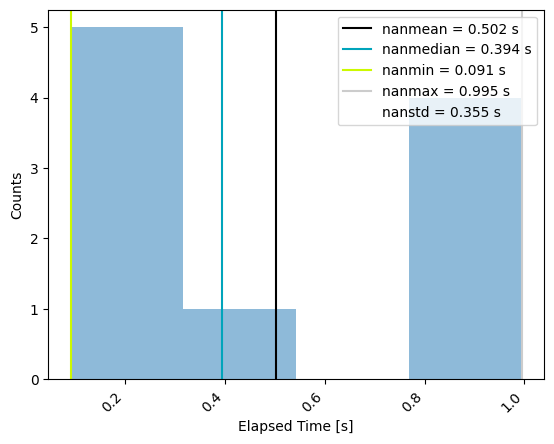

In [7]:
ET.verbose = 0
@ET.get_execstats(n=10, metrics=None, drop_from_df_protocoll=True)
def evaluated_func():
    time.sleep(np.random.rand())
        
    return 'FINISHED'



df_execstats, fig = evaluated_func()

display(df_execstats)

display(ET.df_protocoll)

